In [1]:
import sys
sys.path.insert(0, 'C:/Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data')
import data__, main_, datafactory
from importlib import reload
reload(data__)
reload(main_)
reload(datafactory)
from datafactory import DataSet
from data__ import Transform
from main_ import Model
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
#target = "power_consumption_kwh"
target = "thermal_consumption_kwh"

dset = DataSet(start_date="2022-01-01", target=target, scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=0.5, feedin_price=0.5).pipeline()
#dset = dset[["date","i_m1sum",target]]

dset = dset[["date",target]]


t = Transform(dataset=dset, resample="h", target=target, scale_X=True)
data= t.transform()
data

0.07637132957990407 1.272


C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values
C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values


,val_last_day,val_last_week,mean_24h,month,hour,weekday,day_continuous,thermal_consumption_kwh
0,0.000389,-0.000135,0.002338,1,0,5,-1.630831,0.445731
1,0.000389,-0.000135,0.002338,1,1,5,-1.630831,0.174417
2,0.000389,-0.000135,0.002338,1,2,5,-1.630831,0.135657
3,0.000389,-0.000135,0.002338,1,3,5,-1.630831,0.232556
4,0.000389,-0.000135,0.002338,1,4,5,-1.630831,0.465111
...,...,...,...,...,...,...,...,...
5521,-0.141921,-0.198194,0.339395,8,1,4,0.438983,0.116278
5522,-0.170025,-0.142116,0.312142,8,2,4,0.438983,0.174417
5523,-0.141921,-0.226233,0.312142,8,3,4,0.438983,0.116278
5524,-0.170025,-0.226233,0.284889,8,4,4,0.438983,0.096898


In [5]:
model = Model(model="nn", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05, epochs=200)

dataset shape (5526, 48)
Epoch 1/200


c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 2s 2s/step - loss: 2.0359 - mean_absolute_error: 1.2227 - val_loss: 2.0942 - val_mean_absolute_error: 1.3823
Epoch 2/200
1/1 [==============================] - 0s 62ms/step - loss: 3.0248 - mean_absolute_error: 1.4113 - val_loss: 0.8783 - val_mean_absolute_error: 0.8342
Epoch 3/200
1/1 [==============================] - 0s 64ms/step - loss: 1.7884 - mean_absolute_error: 0.8712 - val_loss: 0.2166 - val_mean_absolute_error: 0.3170
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 1.0485 - mean_absolute_error: 0.4782 - val_loss: 0.9988 - val_mean_absolute_error: 0.9467
Epoch 5/200
1/1 [==============================] - 0s 48ms/step - loss: 1.7598 - mean_absolute_error: 1.0904 - val_loss: 1.1074 - val_mean_absolute_error: 1.0030
Epoch 6/200
1/1 [==============================] - 0s 39ms/step - loss: 1.8508 - mean_absolute_error: 1.1389 - val_loss: 0.5010 - val_mean_absolute_error: 0.6320
Epoch 7/200
1/1 [=========================

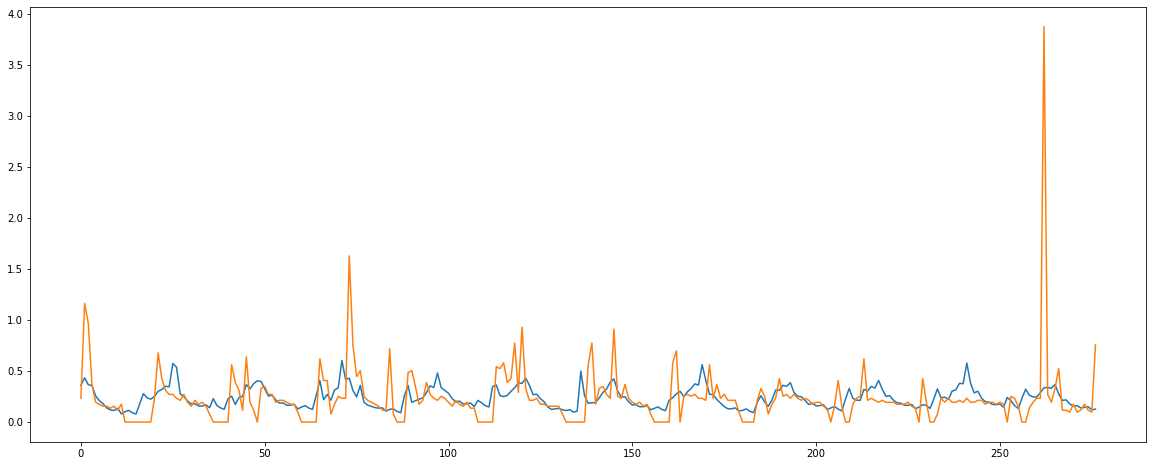

{'mae': 0.13754980993505178,
 'mse': 0.08110645927818108,
 'mape': 155887005751007.94,
 'r2': 0.09807979056863769}

In [8]:
model.results(plot=True)

In [3]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

params_grid = {
  "n_hidden1": [1000, 500],
  "n_hidden2": [250, 200, 100, 50],
  "activation1": ["sigmoid",  "selu", "relu"],
  "activation2": ["sigmoid",  "selu" , "relu"],
  "lr": [0.001, 0.0001]
}

grid = ParameterGrid(params_grid) 

In [ ]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="nn", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05, epochs=100, verbose=0, nn_params=p )
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
df.sort_values(by='mae', ascending=True)

In [6]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

params_grid = {
  "model": "SVR",
  "kernel": ["rbf", "sigmoid", "poly"],
  "degree": [3],  # only valid for "poly" kernel
  "C": [1, 1.1, 1.2, 0.8, 0.9],   # default = 1
  "epsilon": [0.1, 0.2, 0.3, 0.05, 0.03], # default = 0.1
}

grid = ParameterGrid(params_grid) 

TypeError: Parameter grid value is not iterable (key='degree', value=3)

In [ ]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="svr", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05, epochs=100, verbose=0, svr_params=p )
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
df.sort_values(by='mae', ascending=True)

In [7]:
params_grid = {
  "n_epochs": [5], 
  "learning_rate": [0.001], 
  "batch_size": [64], 
  "hidden_size": [50], 
  "num_layers": [1], 
  "lookback_len": [100], 
  "pred_len": [24,40]
}

grid = ParameterGrid(params_grid) 

In [8]:
print(len(grid))
res = []
for p in grid:
    print(p)
    lstm_params= {"n_epochs": p["n_epochs"], "learning_rate": p["learning_rate"], "batch_size": p["batch_size"], "hidden_size": p["hidden_size"], "num_layers": p["hidden_size"], "lookback_len": p["lookback_len"], "pred_len": p["pred_len"]}
    model = Model(model="lstm", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05, epochs=200, lstm_params=lstm_params)

    metrics = model.results()
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
df.sort_values(by='mae', ascending=True)


2
{'batch_size': 64, 'hidden_size': 50, 'learning_rate': 0.001, 'lookback_len': 100, 'n_epochs': 5, 'num_layers': 1, 'pred_len': 24}
dataset shape (5526, 48)
(5249, 48) (277, 1)
### [[ 3.88913979e-04 -1.34607610e-04  2.33802279e-03 ...  1.00000000e+00
   0.00000000e+00  4.45731481e-01]
 [ 3.88913979e-04 -1.34607610e-04  2.33802279e-03 ...  1.00000000e+00
   0.00000000e+00  1.74416667e-01]
 [ 3.88913979e-04 -1.34607610e-04  2.33802279e-03 ...  1.00000000e+00
   0.00000000e+00  1.35657407e-01]
 ...
 [-4.22959562e-01 -8.60378202e-02 -8.73352752e-01 ...  0.00000000e+00
   1.00000000e+00  3.87592593e-01]
 [-4.22959562e-01  5.41574405e-02 -7.37088979e-01 ...  0.00000000e+00
   1.00000000e+00  4.06972222e-01]
 [-4.22959562e-01 -5.79987681e-02 -5.94012018e-01 ...  0.00000000e+00
   1.00000000e+00  2.90694444e-01]] [[ 0.22246483]
 [-0.16997336]
 [-0.22603596]
 ...
 [ 0.13837094]
 [ 0.16640224]
 [-0.00178556]] [[-0.17002459 -0.11407687 -0.49181419 ...  0.          1.
   0.23255556]
 [ 0.19532593